In [38]:
%pylab nbagg
from sympy import *
import numpy as np


 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
init_printing(pretty_print = True)

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pi', 'floor', 'multinomial', 'conjugate', 'cbrt', 'solve', 'sin', 'binomial', 'seterr', 'ones', 'sqrt', 'test', 'trunc', 'vectorize', 'zeros', 'eye', 'Polygon', 'sinc', 'plotting', 'var', 'diag', 'det', 'beta', 'gamma', 'Circle', 'log', 'product', 'transpose', 'diff', 'interactive', 'nan', 'take', 'invert', 'deprecated', 'reshape', 'tanh', 'trace', 'sign', 'add', 'sinh', 'cosh', 'exp', 'cos', 'plot', 'power', 'f', 'roots', 'poly', 'prod', 'tan', 'mod', 'source', 'flatten']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Part A) Derivation

In [39]:
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

In [40]:
genfun = 1/sqrt(1+x**2-2*x*cos(theta))

In [41]:
genfun.series(x,0,4)

In [42]:
getfunc_trunc = (genfun.series(x,0,4)).removeO()

# collect all the coefficients in the above expansion
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(4)]

# verify that these coefficients are in fact the Legendre polynomials
legendre(0,cos(theta)), legendre(1,cos(theta)),\
legendre(2,cos(theta)), legendre(3,cos(theta))

In [43]:
below = getfunc_trunc.subs({r/R: x})

In [44]:
# integrate the truncated series expansion of
# the generating function in theta from 0 to pi
integral = integrate(below, (theta,0,pi))
integral

In [45]:
mu = M/(2*pi*R)
phi = -2*mu*G*integral
phi

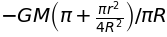

In [46]:
potential = phi.subs({x: r/R})
potential

Part B)

In [47]:
RJ = 7.784e11  # radius of Jupiter's orbit in m
MJ = 1.90e27   # Jupiter's mass in kg
GN = 6.674e-11 # Newton's gravitational constant in SI units
#RS = 1.434e12  # radius of Saturn's orbit in m
RE = 1.496e11 #Radius of Earth's orbit in m

fJS = (potential.subs({G:GN, M:MJ, R:RJ, r/R:(RE/RJ)}))
print ("The gravitational potential of Jupiter as a ring of mass from Earth's orbit is",fJS,"SI units")

The gravitational potential of Jupiter as a ring of mass from Earth's orbit is -164410.261159293 SI units


Part C)

In [34]:
def PHI(N, r):
    '''Function that find the distance and potential between Earth and various points
    on a circle with the radius of Jupiter.'''
    distance_between = []
    potential_between = []
    x_Earth = r
    y_Earth = 0
    theta = 2*np.pi/N
    M_new= MJ/N
    for l in range(N): ##finds the distance between Earth and each point mass
        x_N = RJ*np.cos(l*theta)
        y_N = RJ*np.sin(l*theta)

        d = sqrt((x_N-x_Earth)**2+(y_N-y_Earth)**2)
        distance_between.append(d)

    for k in range(len(distance_between)): ##finds the potential from each point mass M/N to Earth. 
        potential_between.append(-GN*M_new/distance_between[k])
    return sum(potential_between)
    


In [35]:
potentials = []
phi_2 = PHI(2, RE)
phi_4 = PHI(4, RE)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
##Finds the number of masses needed for N and N-1 to be 1e-4 apart.  
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, RE))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI(N, RE)

32


Part D)

The next few blocks are all to calculate PHI(0.2,0.4,....).  At the end I take the abs value of the difference between
the potentials and PHI(0) and plot the relationship which is shown to be quadratic in nature.  

In [51]:
potentials = []
phi_2 = PHI(2, 0.2*RE)
phi_4 = PHI(4, 0.2*RE)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, 0.2*RE))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI_2 = PHI(N, 0.2*RE)

16


In [52]:
potentials = []
phi_2 = PHI(2, 0.4*RE)
phi_4 = PHI(4, 0.4*RE)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, 0.4*RE))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI_4 = PHI(N, 0.4*RE)

16


In [53]:
potentials = []
phi_2 = PHI(2, 0.6*RE)
phi_4 = PHI(4, 0.6*RE)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, 0.6*RE))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI_6 = PHI(N, 0.6*RE)

32


In [54]:
potentials = []
phi_2 = PHI(2, 0.8*RE)
phi_4 = PHI(4, 0.8*RE)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, 0.8*RE))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI_8 = PHI(N, 0.8*RE)

32


In [55]:
potentials = []
phi_2 = PHI(2, 0)
phi_4 = PHI(4, 0)
phi_diff = abs(phi_4-phi_2)
potentials.append(phi_2)
potentials.append(phi_4)
N = 4
while phi_diff > 1e-4:
    N  = N*2
    potentials.append(PHI(N, 0))
    phi_diff = abs(potentials[-1] - potentials[-2])
print(N)
PHI_0 = PHI(N, 0)

4


In [63]:
PHIS = [abs(PHI_2-PHI_0), abs(PHI_4-PHI_0), abs(PHI_6 - PHI_0), abs(PHI_8 - PHI_0)]
d = linspace(0,1, 5)

<IPython.core.display.Javascript object>


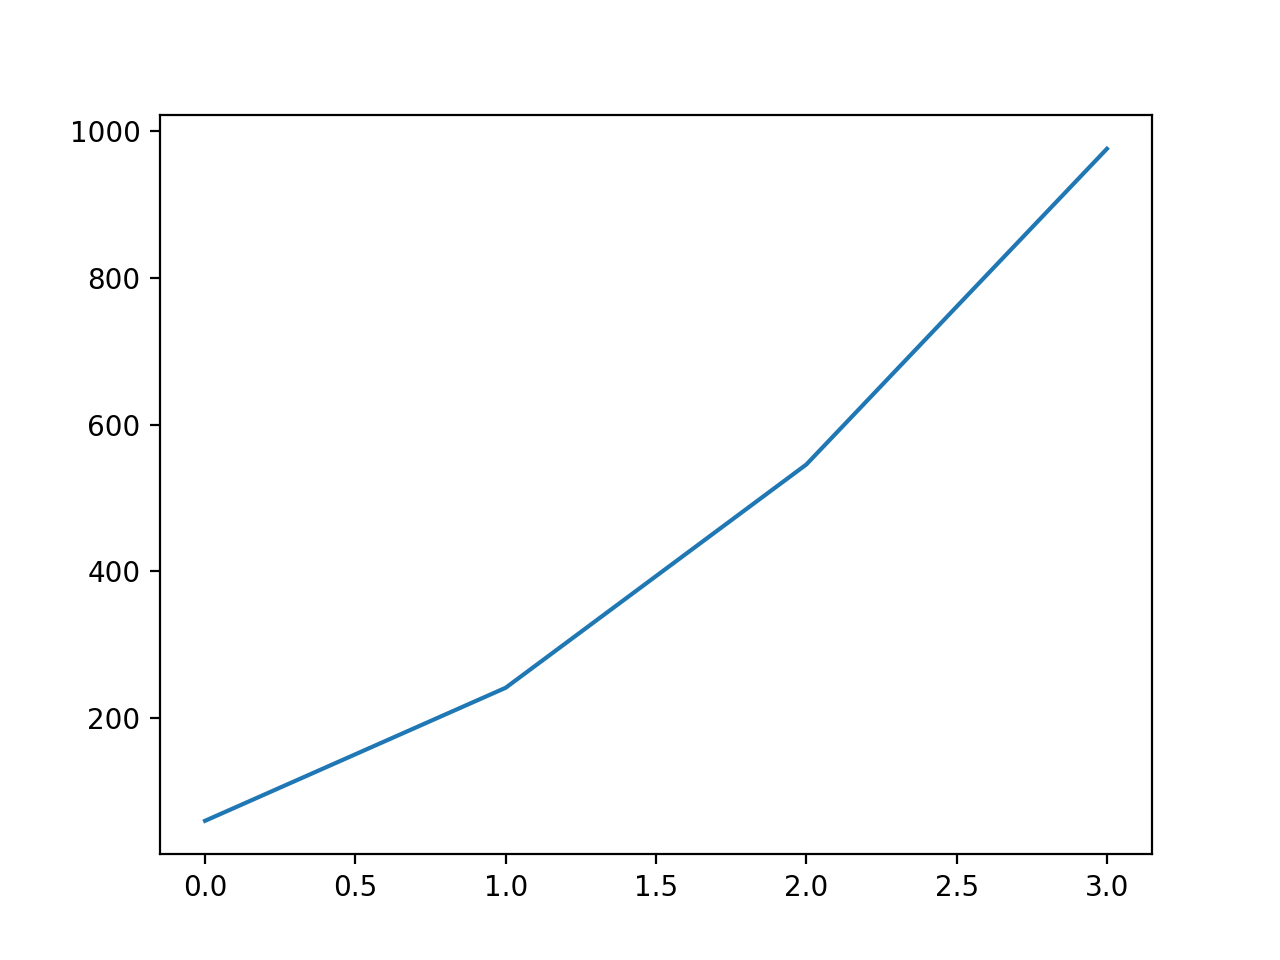

In [64]:
plt.plot(PHIS)

As seen above, the relationship is quadratically dependent.  